TODO: to show the rashomon effect and that interpretability can aid

$(0,0)$
- L: $x3>-46, x2>-43, x1>-43$ (43 instances)
    - LR: $-46<x3<131$
        - LRL: $111<x2, 111<x1$ (25 instances)
            - CF: $x1≤22 \rightarrow (0,1)$
            - CF: $x2≤22 \rightarrow (1,0)$
        - LRR: $x2<112, x1<112$ (18 instances)
- R: $x3<-31$ (92 instances)
    - RL: $x3<-302, x2<19, x1<19$ (6 instances)
        - CF: $x3≥0, x1≥151 \rightarrow (1,0)$
        - CF: $x3≥0, x2≥151 \rightarrow (0,1)$
    - RR: $x3>-268$ (86 instances)
        - RRL: $x3<-117, x2<85, x1<85$ (28 instances)
            - CF: $x3≥23, x1≥93 \rightarrow (1,0)$
            - CF: $x3≥23, x2≥93 \rightarrow (0,1)$
        - RRR: $x1>-19, x2>-19$ (58 instances)
            - CF: $x1≤-150 \rightarrow (0,1)$
            - CF: $x2≤-150 \rightarrow (1,0)$

In [1]:
import matplotlib.pyplot as plt
import shap
import pickle
import cloudpickle
import numpy as np
import scipy as sp
import pandas as pd
from comparers import ModelComparer, plot_decision_boundary
from explainers import generate_shap_explanations, calc_feature_order, calc_class_order,\
                       plot_feature_importance_bar, plot_class_importances
from clustering import make_clustering, plot_dendrogram
from tasks.rashomon_example import make_task
shap.initjs()
%matplotlib inline

# Setup Task

In [2]:
clf_a, clf_b, X, y, feature_names = make_task()

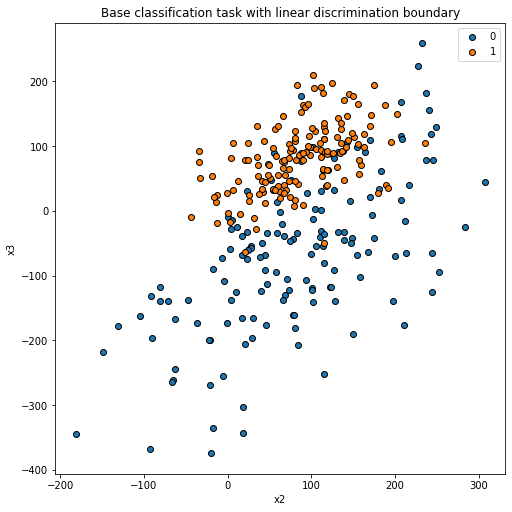

In [3]:
fig, ax = plt.subplots(figsize=(7, 7), constrained_layout=True)
plot_decision_boundary(X, y, 'Base classification task with linear discrimination boundary', feature_names,
                       predict=clf_a.predict, class_names=clf_a.classes_, idx_x=1, idx_y=2,
                       fig=fig, ax=ax)

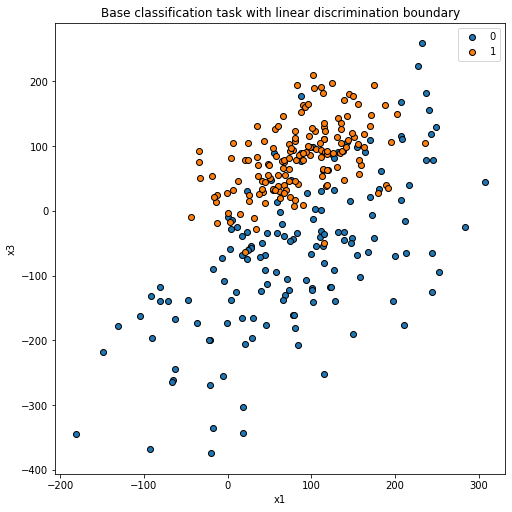

In [4]:
fig, ax = plt.subplots(figsize=(7, 7), constrained_layout=True)
plot_decision_boundary(X, y, 'Base classification task with linear discrimination boundary', feature_names,
                       predict=clf_a.predict, class_names=clf_a.classes_, idx_x=0, idx_y=2,
                       fig=fig, ax=ax)

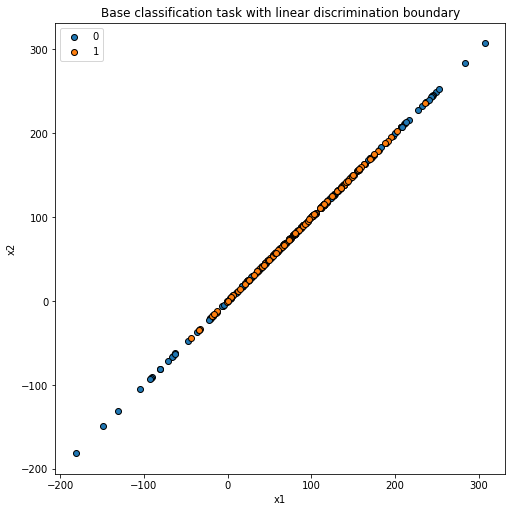

In [5]:
fig, ax = plt.subplots(figsize=(7, 7), constrained_layout=True)
plot_decision_boundary(X, y, 'Base classification task with linear discrimination boundary', feature_names,
                       predict=clf_a.predict, class_names=clf_a.classes_, idx_x=0, idx_y=1,
                       fig=fig, ax=ax)

In [3]:
comparer = ModelComparer(clf_a, clf_b, feature_names)
comparer.fit(X, y)

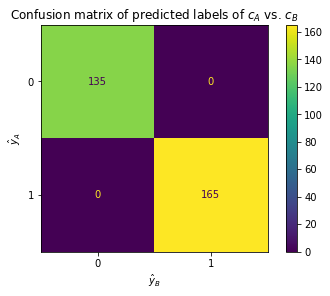

In [4]:
comparer.plot_confusion_matrix(X)

SHAP values are calculated using the exact algorithm, because it is quick enough for up to 10 features.

In [8]:
%%time
masker = shap.maskers.Independent(data=X, max_samples=X.shape[0])
explanations, indices_nonfinite_predictions, explanations_nonfinite = \
    generate_shap_explanations(comparer, X, masker=masker,
                               explanation_types=['indiv', 'indiv_diff', 'mclass_diff'],
                               space_types=['log_odds'])
with open('shap.expl', 'wb') as f:
    pickle.dump((explanations, indices_nonfinite_predictions, explanations_nonfinite, comparer),
                f, pickle.HIGHEST_PROTOCOL)

CPU times: user 6.04 s, sys: 93.5 ms, total: 6.13 s
Wall time: 6.21 s


In [9]:
explanations.shape, indices_nonfinite_predictions.shape, explanations_nonfinite.shape

((300, 3), (0,), (0,))

In [10]:
x1lim = explanations.data[:, 0].min() - 0.5, explanations.data[:, 0].max() + 0.5
x2lim = explanations.data[:, 1].min() - 0.5, explanations.data[:, 1].max() + 0.5
x3lim = explanations.data[:, 2].min() - 0.5, explanations.data[:, 2].max() + 0.5

# Traditional SHAP Explanations

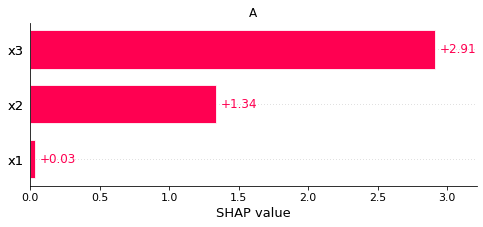

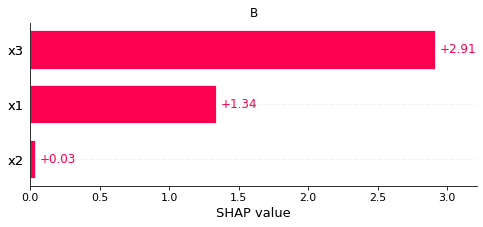

In [11]:
feature_order, feature_importance = calc_feature_order(explanations.indiv.log_odds.A[:, :, 1])
plot_feature_importance_bar(feature_importance, 'A', feature_order)
feature_order, feature_importance = calc_feature_order(explanations.indiv.log_odds.B[:, :, 1])
plot_feature_importance_bar(feature_importance, 'B', feature_order)

In [12]:
feature_order, _ = calc_feature_order(explanations.indiv.log_odds[:, :, 1])

In [13]:
node, Z = make_clustering(comparer, explanations.indiv.log_odds[:, :, 1])

root
(1, 1)    165
(0, 0)    135
dtype: int64


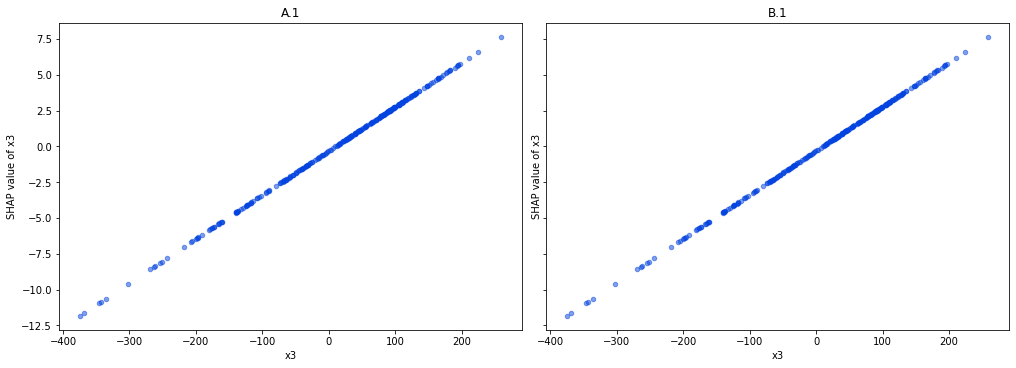

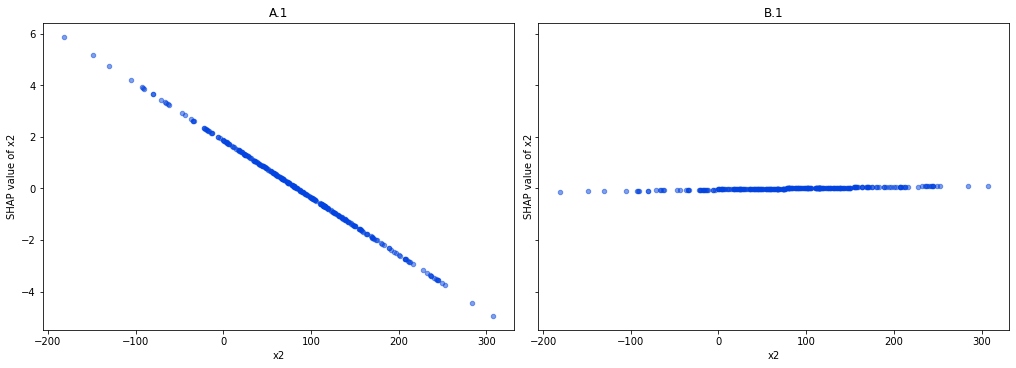

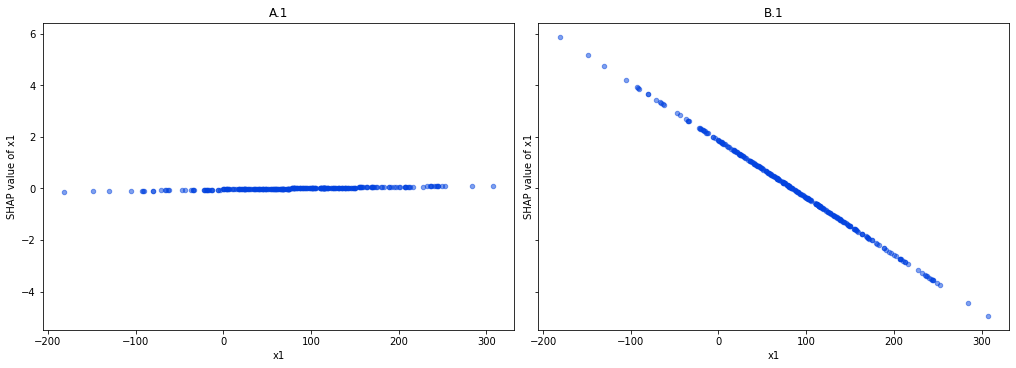

In [14]:
for feature in feature_order:
    node.plot_feature(feature, alpha=0.5)

# Difference Classifier SHAP Explanations

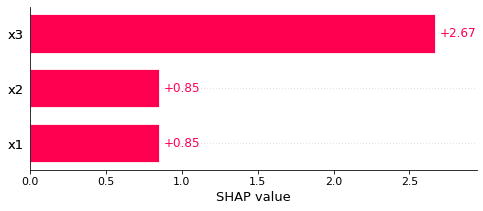

In [15]:
feature_order, feature_importances = calc_feature_order(explanations.mclass_diff.log_odds)
plot_feature_importance_bar(feature_importances)

In [16]:
global_feature_order = feature_order

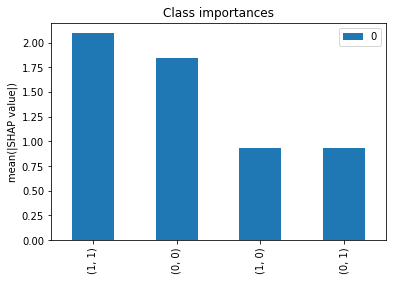

In [17]:
class_order, class_importances = calc_class_order(explanations.mclass_diff.log_odds)
plot_class_importances(class_importances, class_order, explanations.mclass_diff.output_names)

## Clustering of difference class SHAP Values

In [131]:
node, Z = make_clustering(comparer, explanations.mclass_diff.log_odds, '(0, 0)',
                          ['(0, 0)', '(0, 1)', '(1, 0)'])

root
(1, 1)    165
(0, 0)    135
dtype: int64


### Root Node

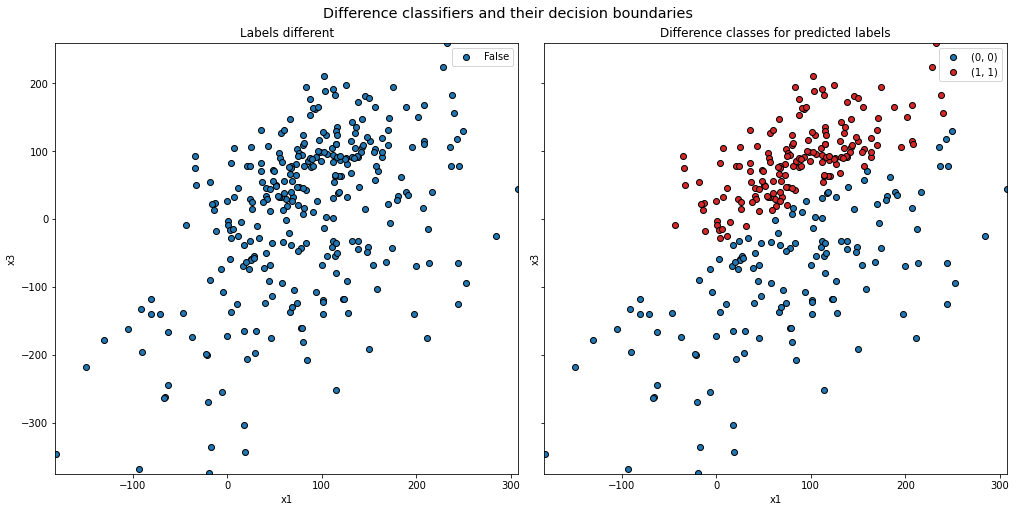

In [60]:
comparer.plot_decision_boundaries(node.shap_values.data, idx_x=0, idx_y=2, xlim=x1lim, ylim=x3lim)

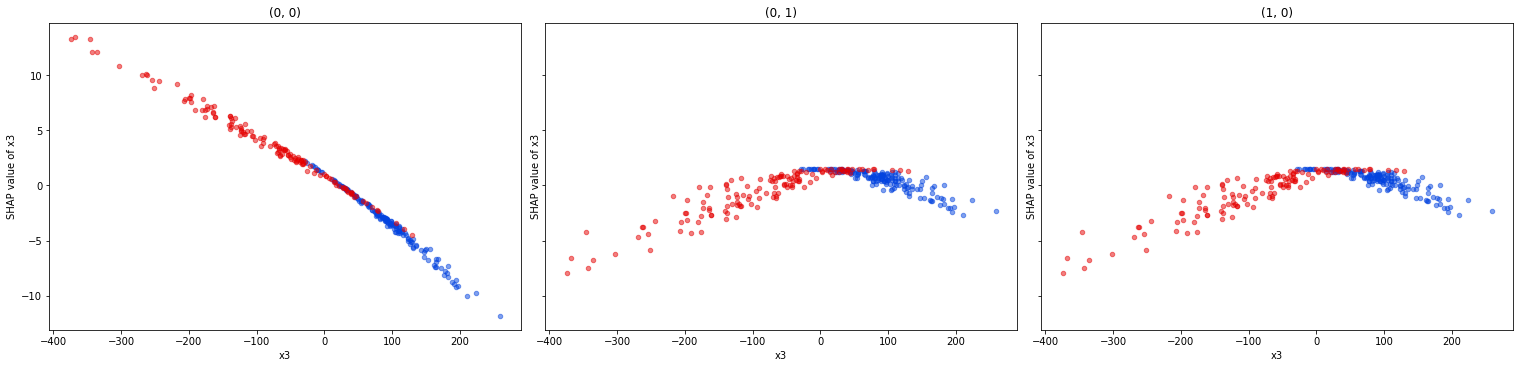

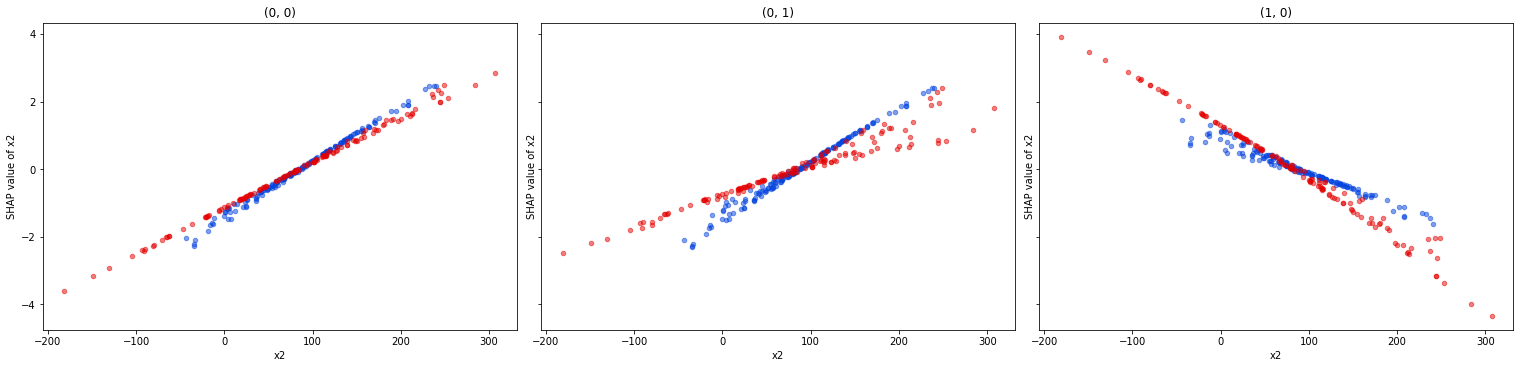

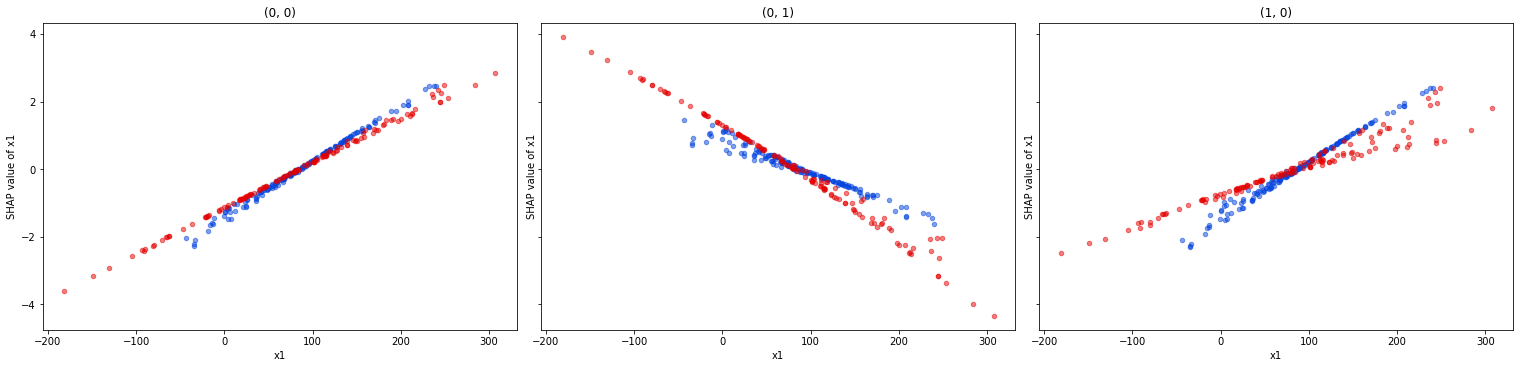

In [61]:
for feature in global_feature_order:
    node.plot_feature(feature, alpha=0.5)

In [ ]:
fig, ax = plt.subplots()
ax.scatter()

In [88]:
colors

array([[ 57.19527261, -30.8517715 ,  54.18911731, -46.11811428],
       [ 55.2803549 , -30.03500081,  52.64644158, -44.74898896],
       [ 47.04692708, -26.35422753,  45.62702523, -38.66833686],
       ...,
       [ 22.13468268, -33.09491871,   9.9970066 , -33.54636765],
       [ 12.75278729, -19.06776585,   5.97316453, -19.00326102],
       [  9.37432655, -14.13992228,   4.6130088 , -13.75020301]])

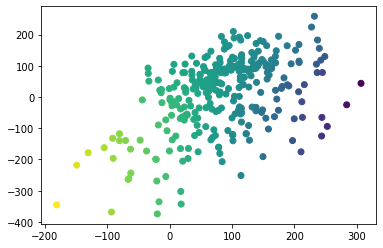

In [89]:
fig, ax = plt.subplots()
s = node.shap_values[:, :, '(0, 1)']
colors = s[:, 'x1'].values
colors *= 100.0/colors.max()
ax.scatter(s[:, 'x1'].data, s[:, 'x3'].data, c=colors)

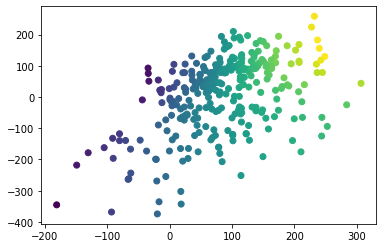

In [90]:
fig, ax = plt.subplots()
s = node.shap_values[:, :, '(1, 0)']
colors = s[:, 'x1'].values
colors *= 100.0/colors.max()
ax.scatter(s[:, 'x1'].data, s[:, 'x3'].data, c=colors)

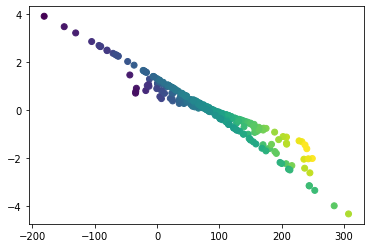

In [79]:
fig, ax = plt.subplots()
s = node.shap_values[:, 'x1', '(0, 1)']
colors = node.shap_values[:, 'x2', '(0, 1)'].values
colors *= 100.0/colors.max()
ax.scatter(s.data, s.values, c=colors)

### Node L

In [132]:
node = node.get_left()

L
(1, 1)    165
(0, 0)     43
dtype: int64


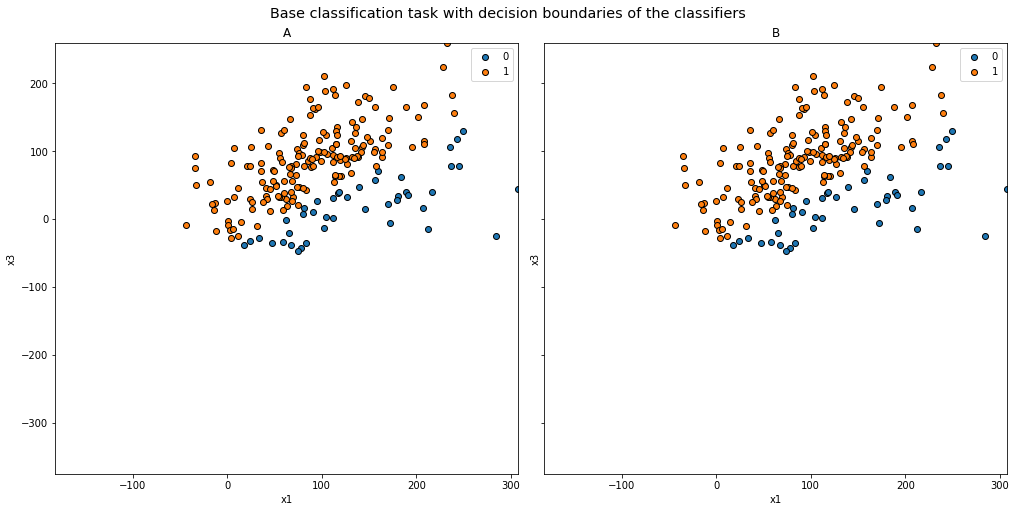

In [63]:
comparer.plot_individual_clf_decision_boundaries(node.shap_values.data, idx_x=0, idx_y=2, xlim=x1lim, ylim=x3lim)

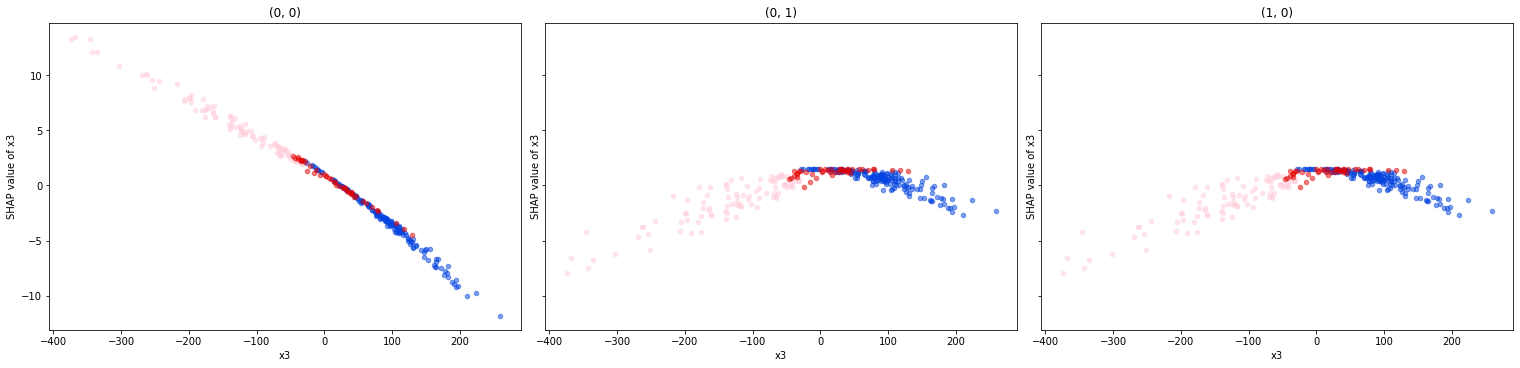

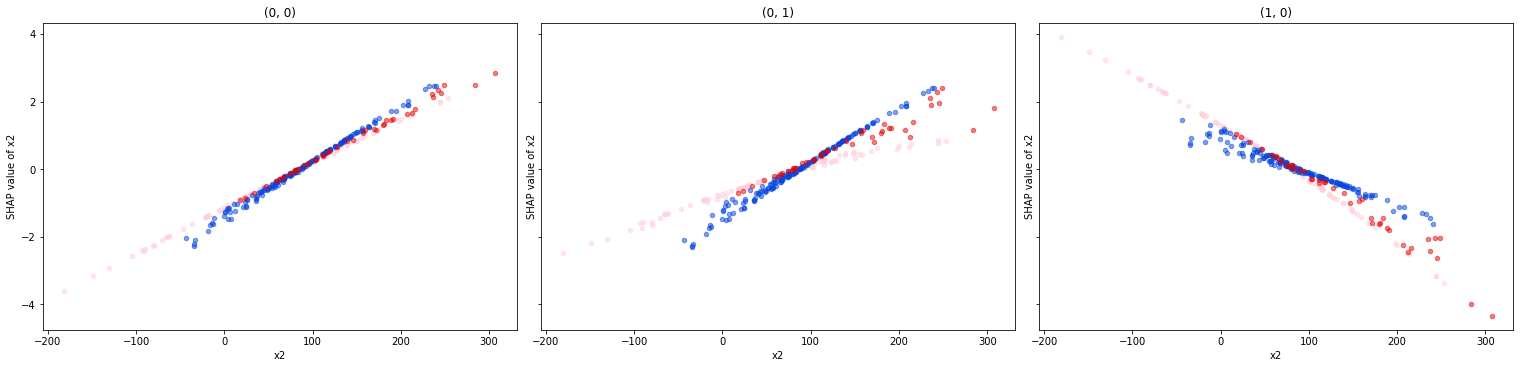

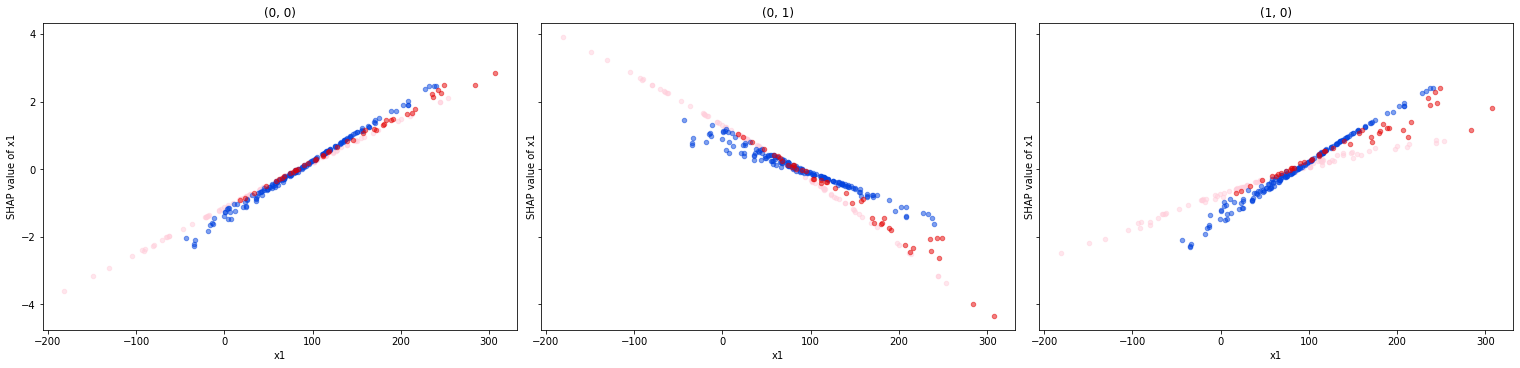

In [64]:
for feature in global_feature_order:
    node.parent.plot_feature(feature, focus=node, alpha=0.5)

In [133]:
node.describe_feature('x3')

,global,local-all,local-diff
count,300.000000,208.000000,43.000000
mean,9.979408,74.322140,19.024652
std,117.978412,59.470644,44.302868
min,-374.445022,-46.308840,-46.308840
25%,-59.339309,32.070028,-17.902597
50%,34.019343,78.379986,16.934925
75%,93.596696,109.615389,40.107235
max,258.940851,258.940851,130.025070


In [134]:
node.describe_feature('x2')

,global,local-all,local-diff
count,300.000000,208.000000,43.000000
mean,84.138769,98.716143,140.795758
std,77.917955,65.841392,73.869793
min,-181.190181,-43.736132,17.757624
25%,35.786394,56.562570,80.433675
50%,83.158128,91.459302,127.117421
75%,131.776480,137.394976,190.129959
max,307.157526,307.157526,307.157526


In [135]:
node.describe_feature('x1')

,global,local-all,local-diff
count,300.000000,208.000000,43.000000
mean,84.138769,98.716143,140.795758
std,77.917955,65.841392,73.869793
min,-181.190181,-43.736132,17.757624
25%,35.786394,56.562570,80.433675
50%,83.158128,91.459302,127.117421
75%,131.776480,137.394976,190.129959
max,307.157526,307.157526,307.157526


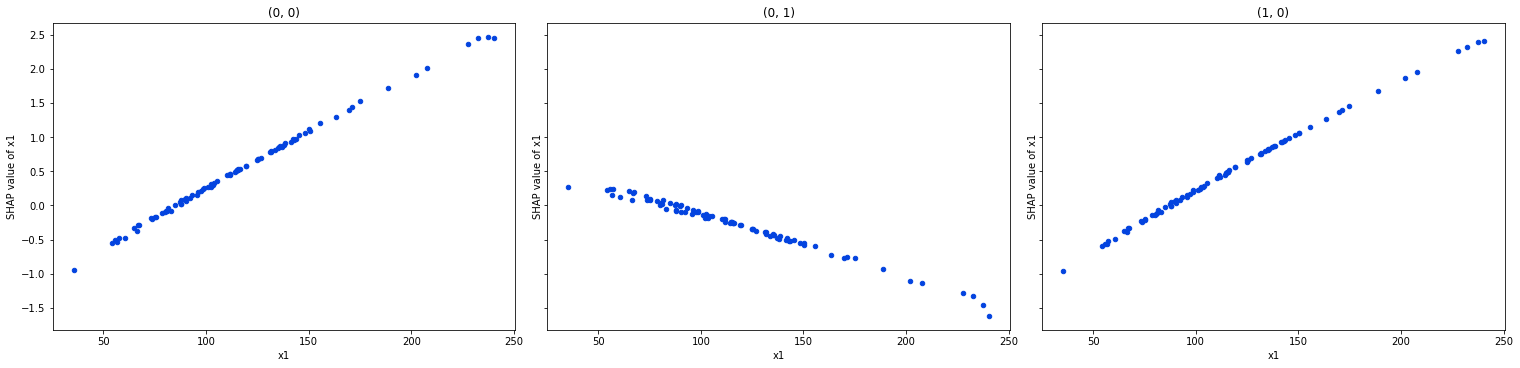

In [70]:
node.plot_feature('x1')

In [69]:
node.shap_values.shap_interaction_values

AttributeError: 'Explanation' object has no attribute 'shap_interaction_values'

In [68]:
node.test(x1=-200)

,before,after


In [66]:
node.test_all(x2=-200)

,before,after
"(0, 0)",43.0,NaN
"(1, 0)",NaN,48.0
"(1, 1)",165.0,160.0


### Node LR

In [136]:
node = node.get_right()

LR
(1, 1)    77
(0, 0)    43
dtype: int64


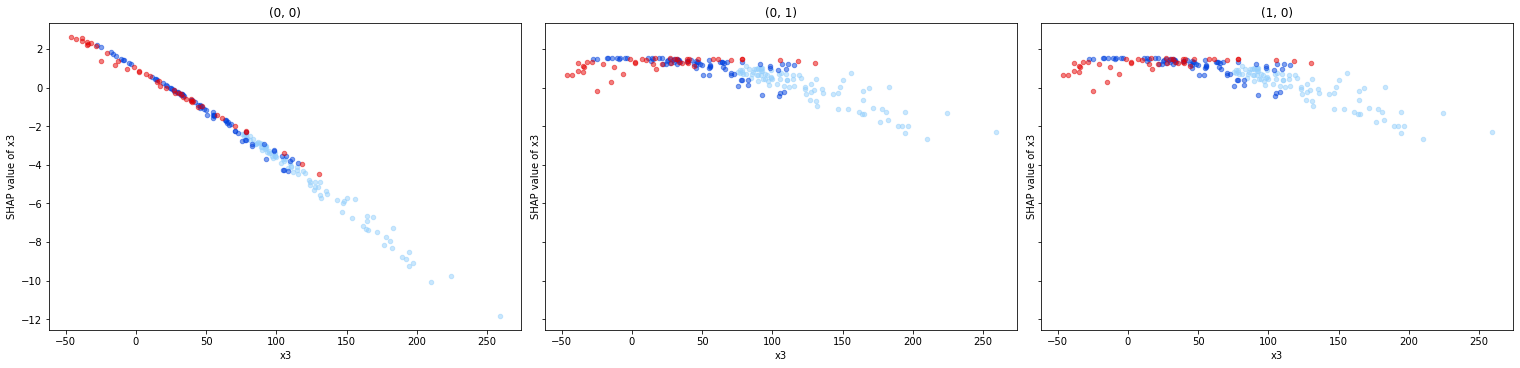

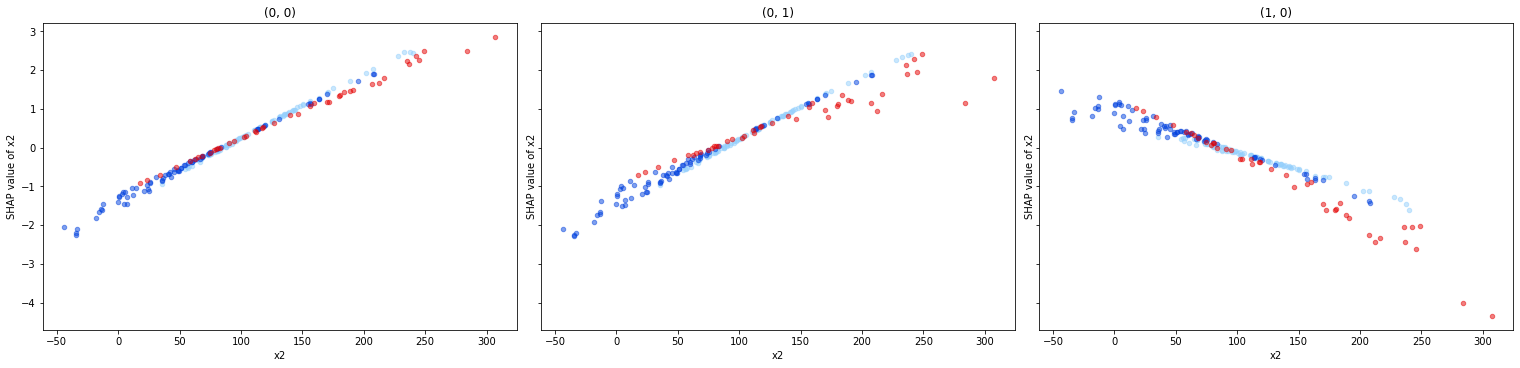

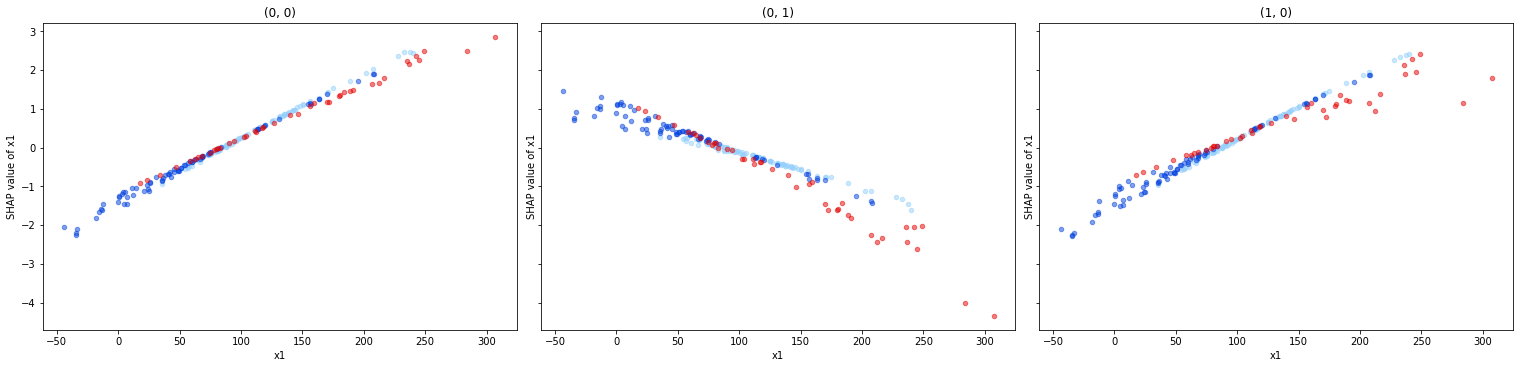

In [100]:
for feature in global_feature_order:
    node.parent.plot_feature(feature, focus=node, alpha=0.5)

In [137]:
node.describe_feature('x3')

,global,local-all,local-diff
count,300.000000,120.000000,43.000000
mean,9.979408,37.326157,19.024652
std,117.978412,41.356247,44.302868
min,-374.445022,-46.308840,-46.308840
25%,-59.339309,13.371394,-17.902597
50%,34.019343,37.221906,16.934925
75%,93.596696,65.035239,40.107235
max,258.940851,130.025070,130.025070


In [138]:
node.describe_feature('x2')

,global,local-all,local-diff
count,300.000000,120.000000,43.000000
mean,84.138769,85.738841,140.795758
std,77.917955,76.138673,73.869793
min,-181.190181,-43.736132,17.757624
25%,35.786394,33.059806,80.433675
50%,83.158128,67.915109,127.117421
75%,131.776480,132.905533,190.129959
max,307.157526,307.157526,307.157526


In [139]:
node.describe_feature('x1')

,global,local-all,local-diff
count,300.000000,120.000000,43.000000
mean,84.138769,85.738841,140.795758
std,77.917955,76.138673,73.869793
min,-181.190181,-43.736132,17.757624
25%,35.786394,33.059806,80.433675
50%,83.158128,67.915109,127.117421
75%,131.776480,132.905533,190.129959
max,307.157526,307.157526,307.157526


### Node LRL

In [140]:
node = node.get_left()

LRL
(0, 0)    25
(1, 1)    15
dtype: int64


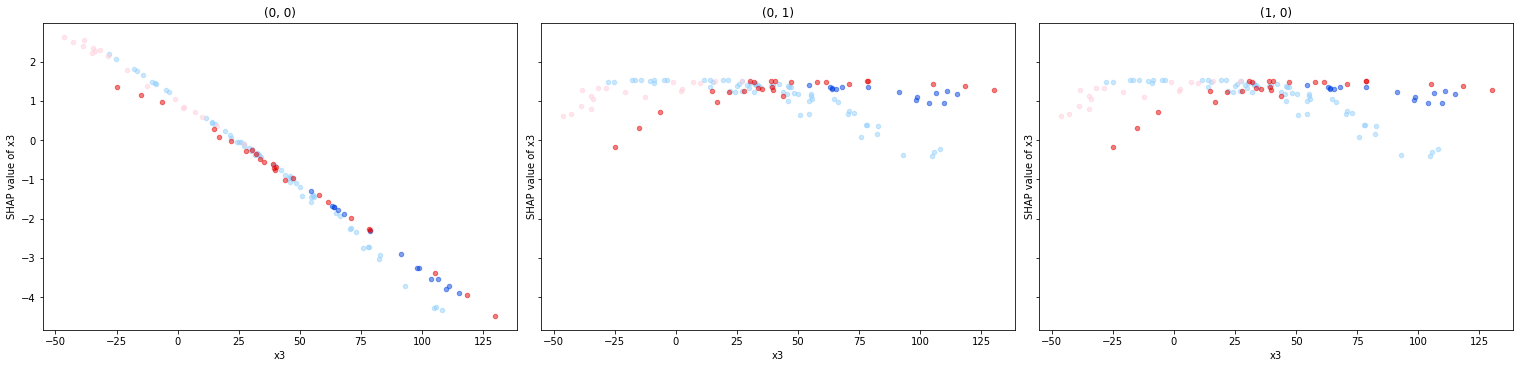

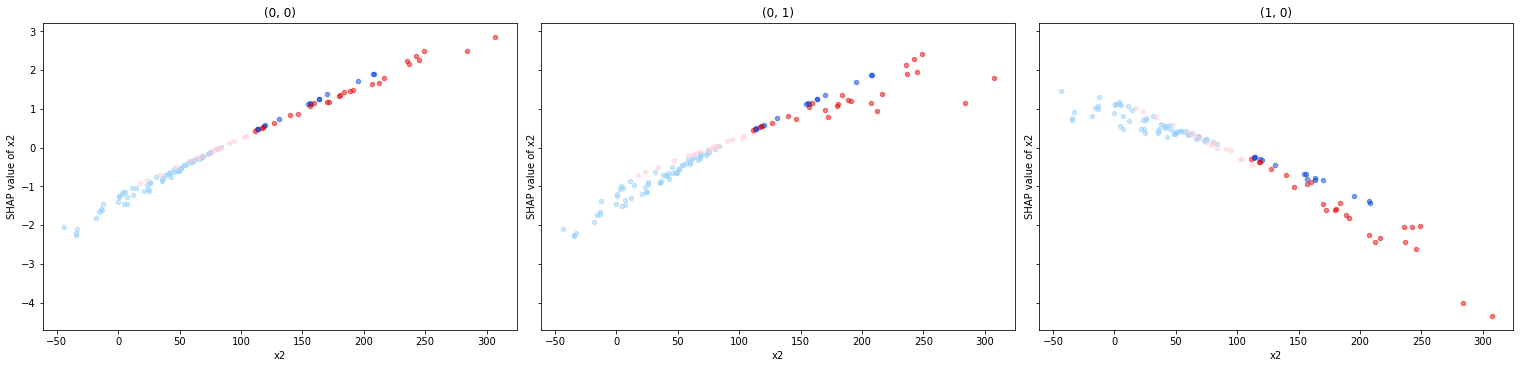

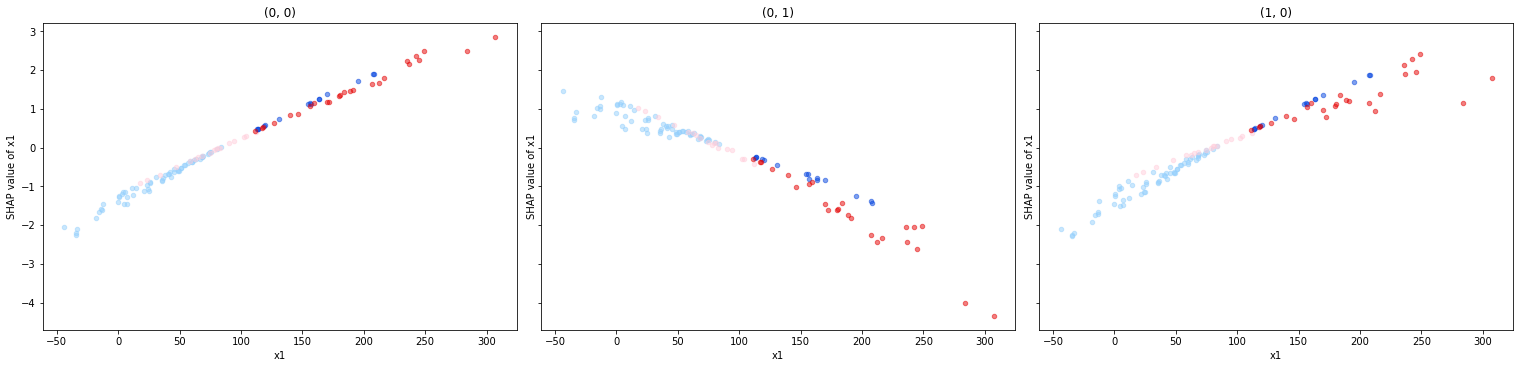

In [126]:
for feature in global_feature_order:
    node.parent.plot_feature(feature, focus=node, alpha=0.5)

In [122]:
node.describe_feature('x3')

,global,local-all,local-diff
count,300.000000,40.000000,25.000000
mean,9.979408,60.225045,44.703013
std,117.978412,38.038035,37.624298
min,-374.445022,-24.826039,-24.826039
25%,-59.339309,35.042451,27.903333
50%,34.019343,62.338987,39.340946
75%,93.596696,93.128867,61.597431
max,258.940851,130.025070,130.025070


In [123]:
node.describe_feature('x2')

,global,local-all,local-diff
count,300.000000,40.000000,25.000000
mean,84.138769,176.570984,191.107326
std,77.917955,49.466328,52.289196
min,-181.190181,111.474925,111.474925
25%,35.786394,137.291420,156.521177
50%,83.158128,170.039148,183.572460
75%,131.776480,207.666643,235.556088
max,307.157526,307.157526,307.157526


In [124]:
node.describe_feature('x1')

,global,local-all,local-diff
count,300.000000,40.000000,25.000000
mean,84.138769,176.570984,191.107326
std,77.917955,49.466328,52.289196
min,-181.190181,111.474925,111.474925
25%,35.786394,137.291420,156.521177
50%,83.158128,170.039148,183.572460
75%,131.776480,207.666643,235.556088
max,307.157526,307.157526,307.157526


We see, that there is a high increasing effect towards $(0,1)$ for x2 for these instances, and a high decreasing effect for x1. The effect suggests, that if x1 is decreased, the effect towards $(0,1)$ would increase.

In [119]:
node.test(x1=22)

,before,after
"(0, 0)",25.0,NaN
"(0, 1)",NaN,25.0


In [127]:
node.test(x2=22)

,before,after
"(0, 0)",25.0,NaN
"(1, 0)",NaN,25.0


### Node LRR

In [141]:
node = node.parent.get_right()

LRR
(1, 1)    62
(0, 0)    18
dtype: int64


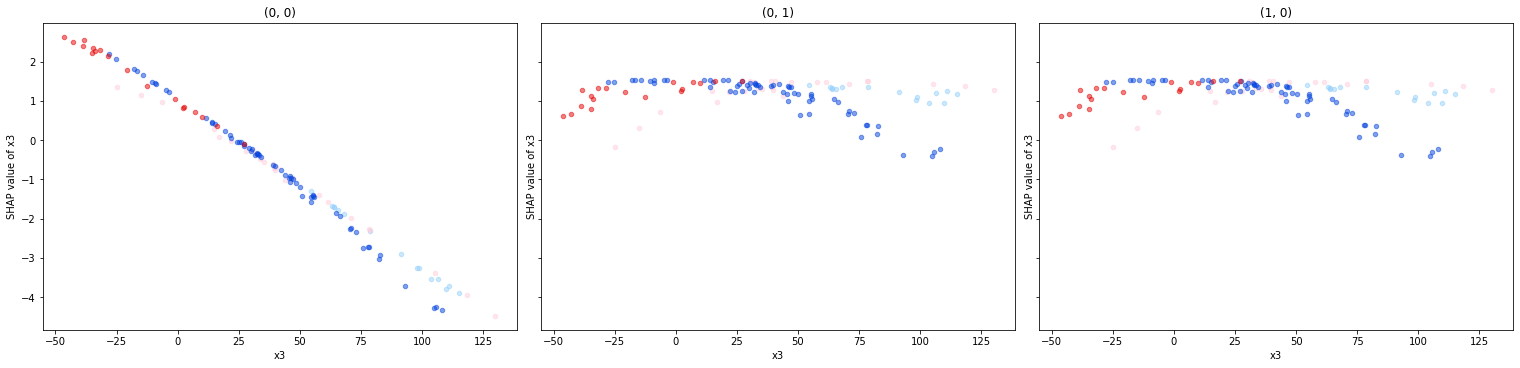

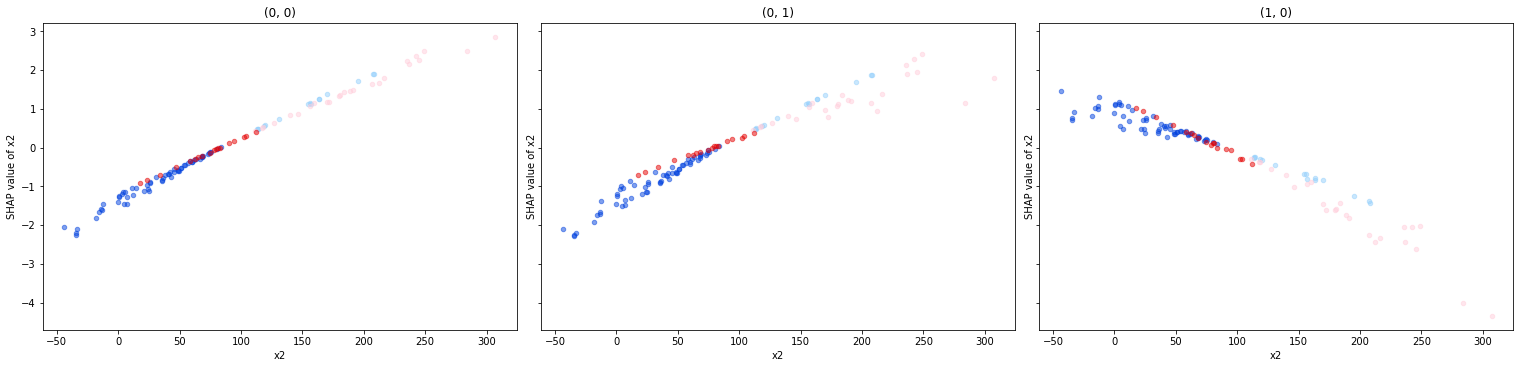

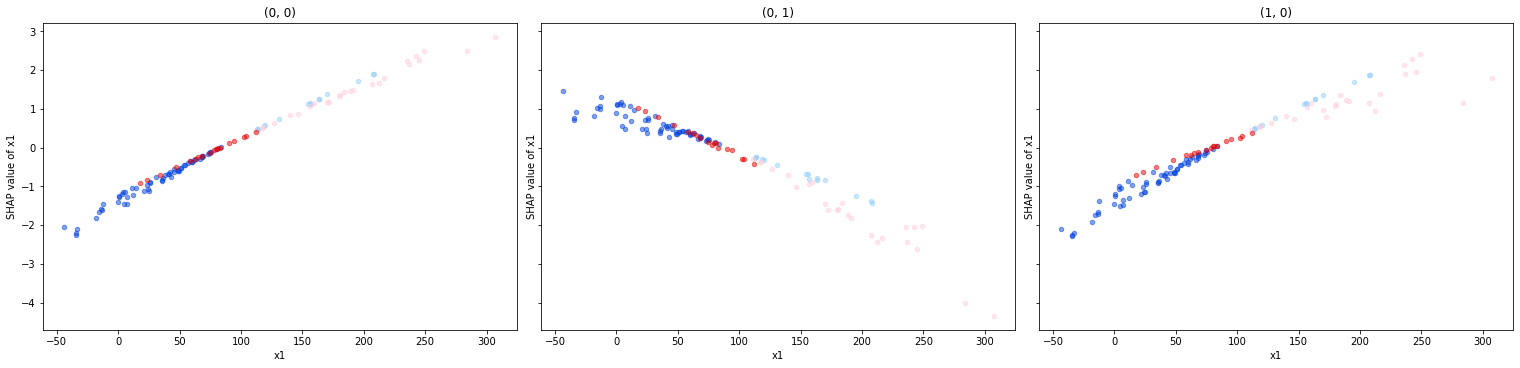

In [130]:
for feature in global_feature_order:
    node.parent.plot_feature(feature, focus=node, alpha=0.5)

In [142]:
node.describe_feature('x2')

,global,local-all,local-diff
count,300.000000,80.000000,18.000000
mean,84.138769,40.322769,70.918579
std,77.917955,35.470816,26.998252
min,-181.190181,-43.736132,17.757624
25%,35.786394,13.951801,59.483273
50%,83.158128,45.140488,76.305568
75%,131.776480,67.896520,88.670486
max,307.157526,111.884657,111.884657


In [143]:
node.describe_feature('x1')

,global,local-all,local-diff
count,300.000000,80.000000,18.000000
mean,84.138769,40.322769,70.918579
std,77.917955,35.470816,26.998252
min,-181.190181,-43.736132,17.757624
25%,35.786394,13.951801,59.483273
50%,83.158128,45.140488,76.305568
75%,131.776480,67.896520,88.670486
max,307.157526,111.884657,111.884657


### Node R

In [146]:
node = node.parent.parent.parent.get_right()

R
(0, 0)    92
dtype: int64


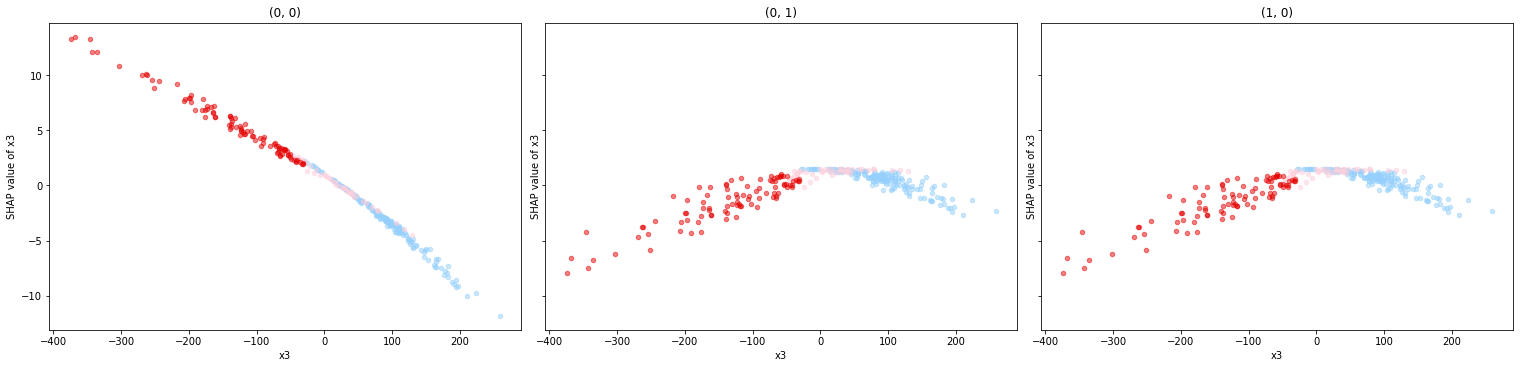

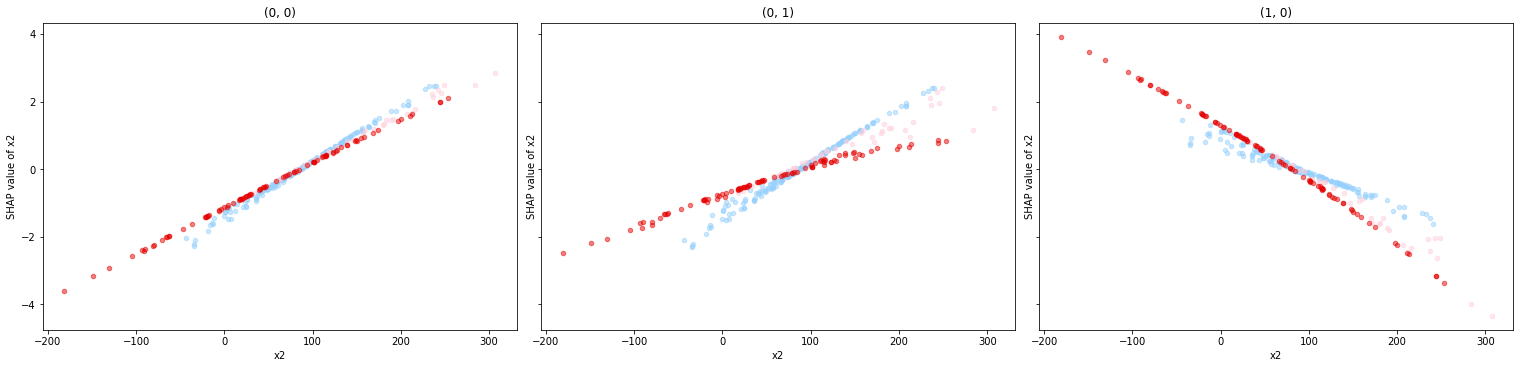

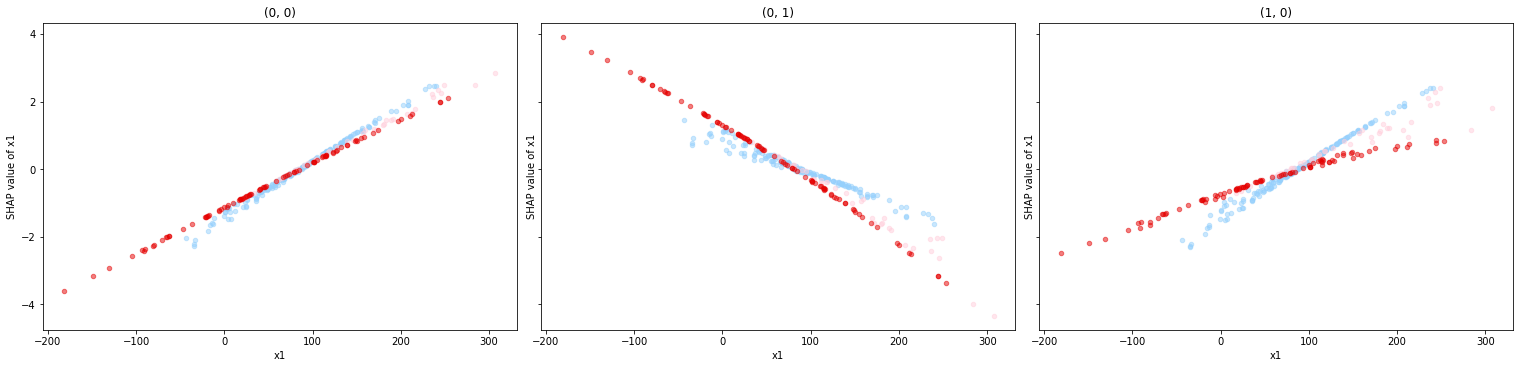

In [147]:
for feature in global_feature_order:
    node.parent.plot_feature(feature, focus=node, alpha=0.5)

In [172]:
node.describe_feature('x3')

,global,local-all,local-diff
count,300.000000,92.000000,92.000000
mean,9.979408,-135.491117,-135.491117
std,117.978412,82.651973,82.651973
min,-374.445022,-374.445022,-374.445022
25%,-59.339309,-175.523092,-175.523092
50%,34.019343,-122.751115,-122.751115
75%,93.596696,-67.322895,-67.322895
max,258.940851,-31.582491,-31.582491


### Node RL

In [183]:
node = node.get_left()

RL
(0, 0)    6
dtype: int64


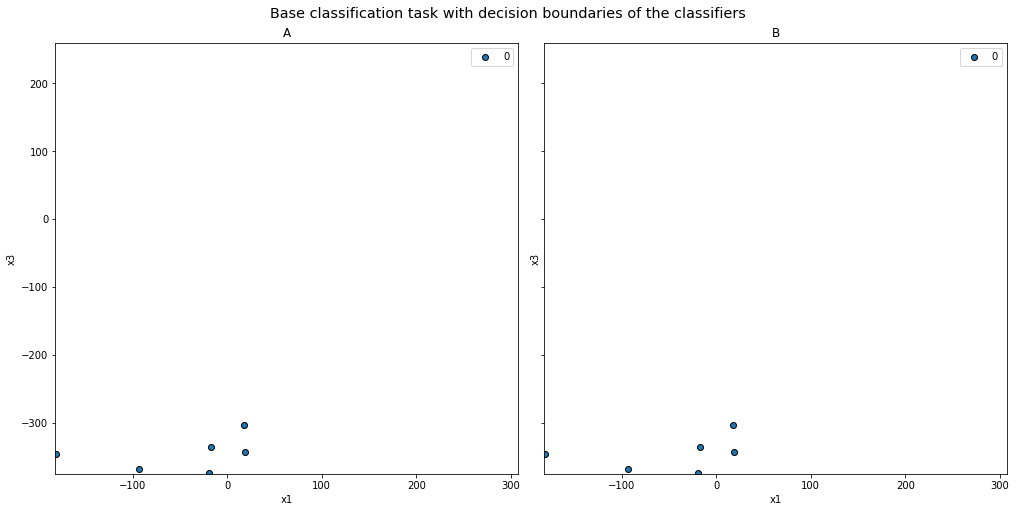

In [184]:
comparer.plot_individual_clf_decision_boundaries(node.shap_values.data, idx_x=0, idx_y=2, xlim=x1lim, ylim=x3lim)

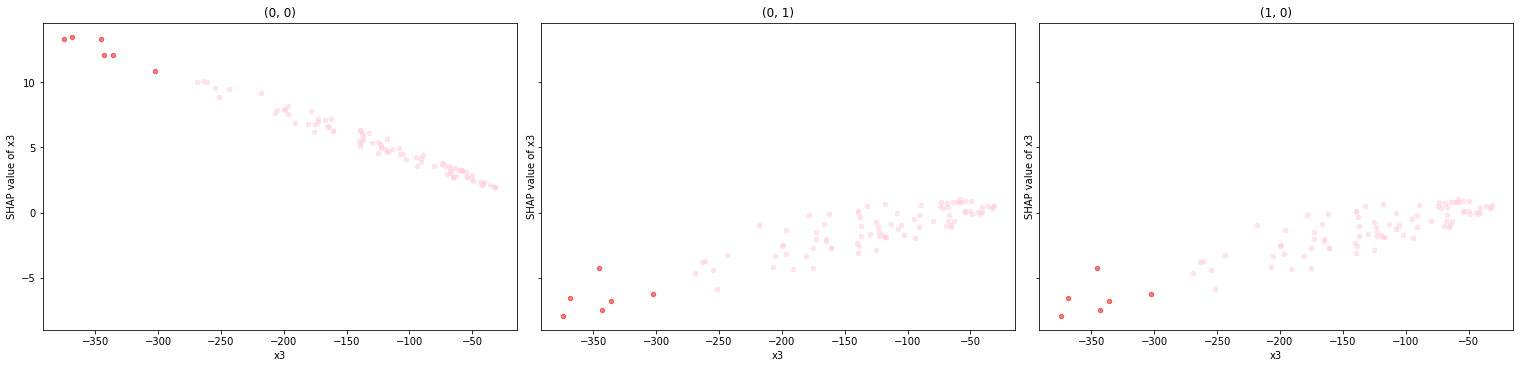

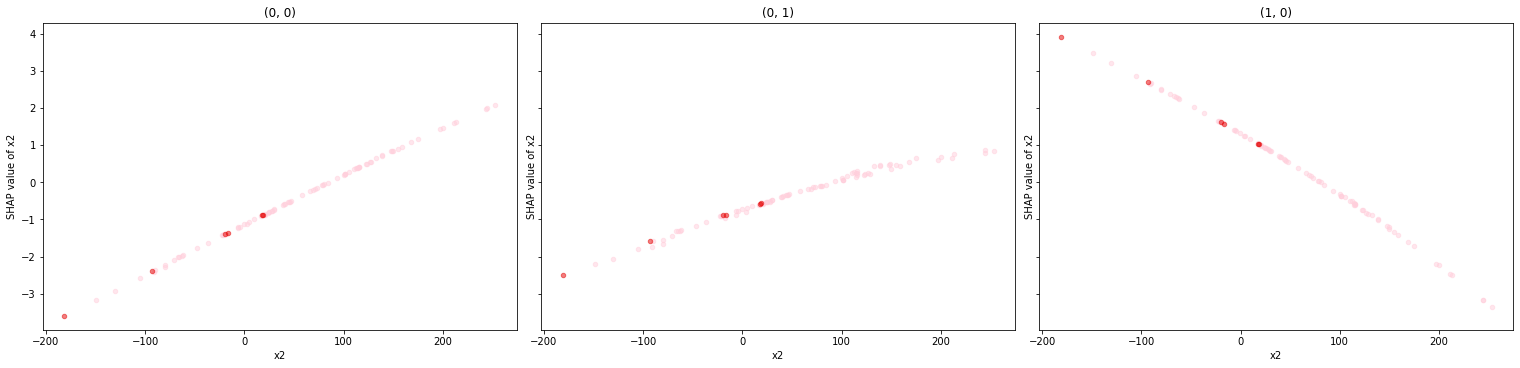

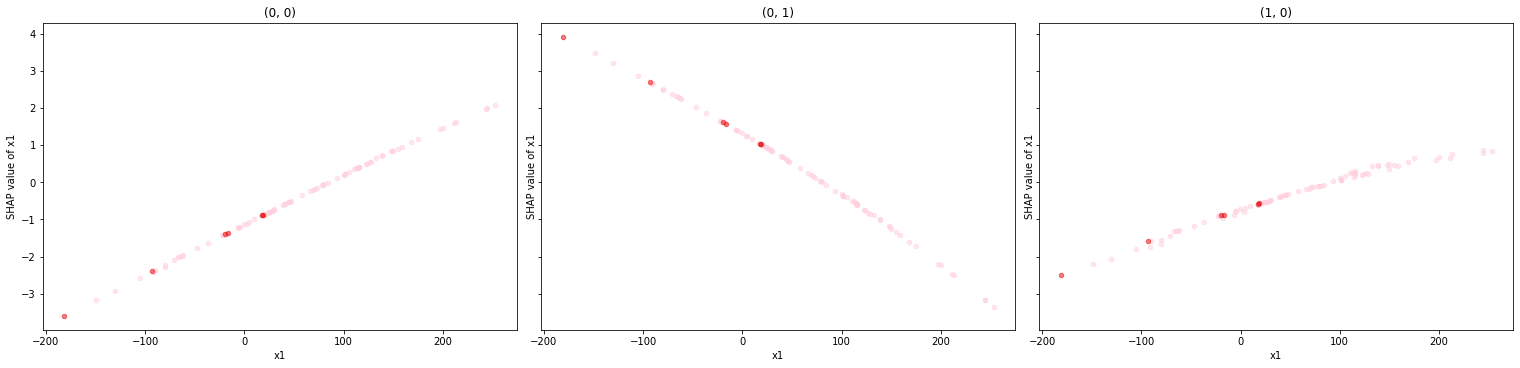

In [185]:
for feature in global_feature_order:
    node.parent.plot_feature(feature, focus=node, alpha=0.5)

In [282]:
node.describe_feature('x3')

,global,local-all,local-diff
count,300.000000,6.000000,6.000000
mean,9.979408,-344.871495,-344.871495
std,117.978412,25.770507,25.770507
min,-374.445022,-374.445022,-374.445022
25%,-59.339309,-362.646637,-362.646637
50%,34.019343,-344.165183,-344.165183
75%,93.596696,-337.472309,-337.472309
max,258.940851,-302.405108,-302.405108


In [283]:
node.describe_feature('x2')

,global,local-all,local-diff
count,300.000000,6.000000,6.000000
mean,84.138769,-45.738712,-45.738712
std,77.917955,77.850930,77.850930
min,-181.190181,-181.190181,-181.190181
25%,35.786394,-74.804702,-74.804702
50%,83.158128,-18.300857,-18.300857
75%,131.776480,9.264594,9.264594
max,307.157526,18.545864,18.545864


In [284]:
node.describe_feature('x1')

,global,local-all,local-diff
count,300.000000,6.000000,6.000000
mean,84.138769,-45.738712,-45.738712
std,77.917955,77.850930,77.850930
min,-181.190181,-181.190181,-181.190181
25%,35.786394,-74.804702,-74.804702
50%,83.158128,-18.300857,-18.300857
75%,131.776480,9.264594,9.264594
max,307.157526,18.545864,18.545864


In [186]:
node.test(x3=0)

,before,after
"(0, 0)",6.0,NaN
"(1, 1)",NaN,6.0


In [187]:
node.test(x3=0, x1=51)

,before,after
"(0, 0)",6.0,NaN
"(1, 0)",NaN,6.0


In [188]:
node.test(x3=0, x2=51)

,before,after
"(0, 0)",6.0,NaN
"(0, 1)",NaN,6.0


In [189]:
node.test(x2=51)

,before,after
"(0, 0)",6,6


In [190]:
node = node.parent.get_right()

RR
(0, 0)    86
dtype: int64


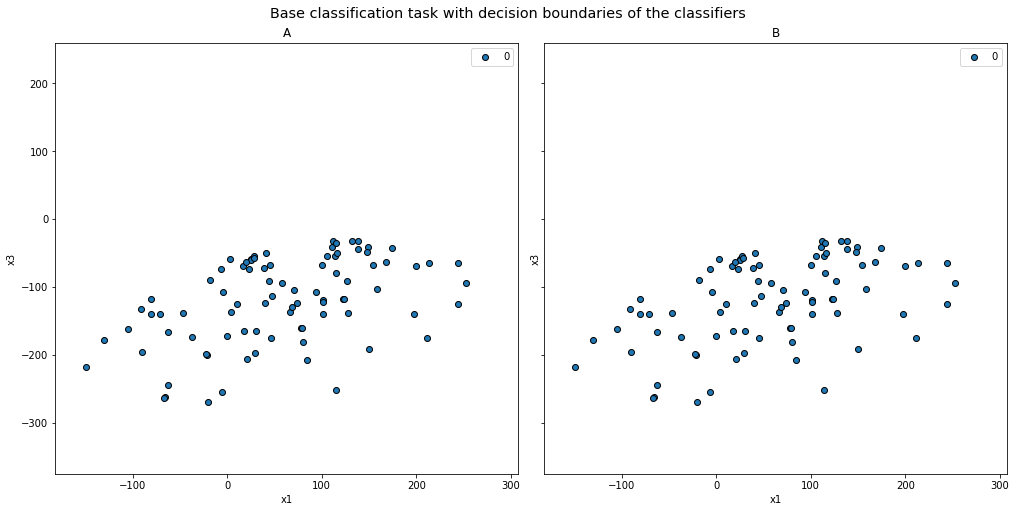

In [191]:
comparer.plot_individual_clf_decision_boundaries(node.shap_values.data, idx_x=0, idx_y=2, xlim=x1lim, ylim=x3lim)

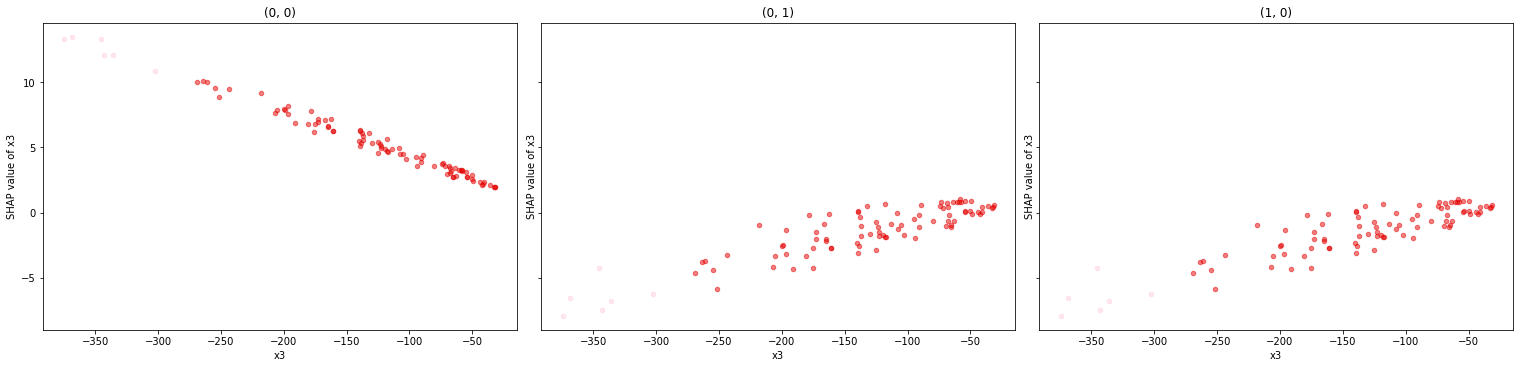

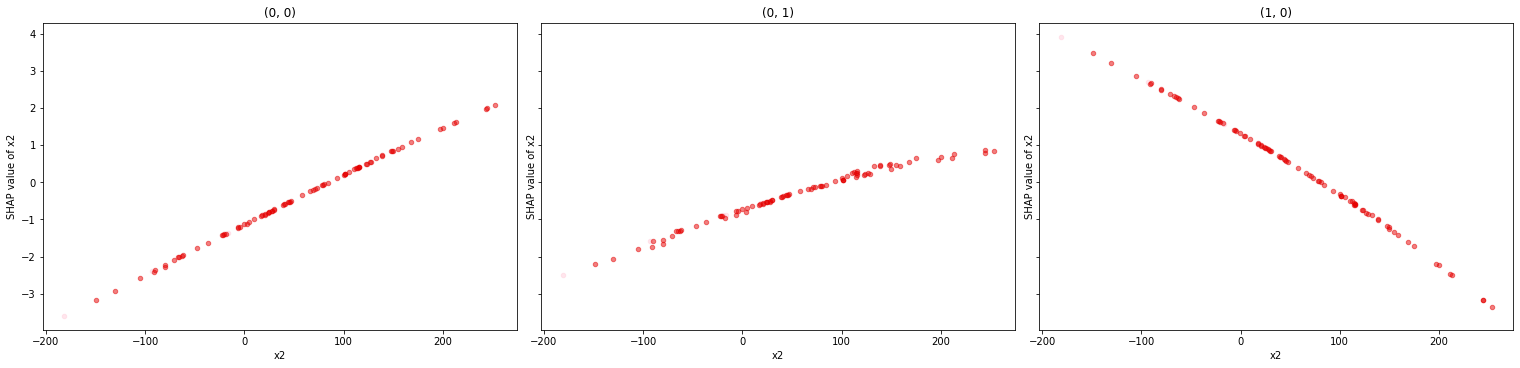

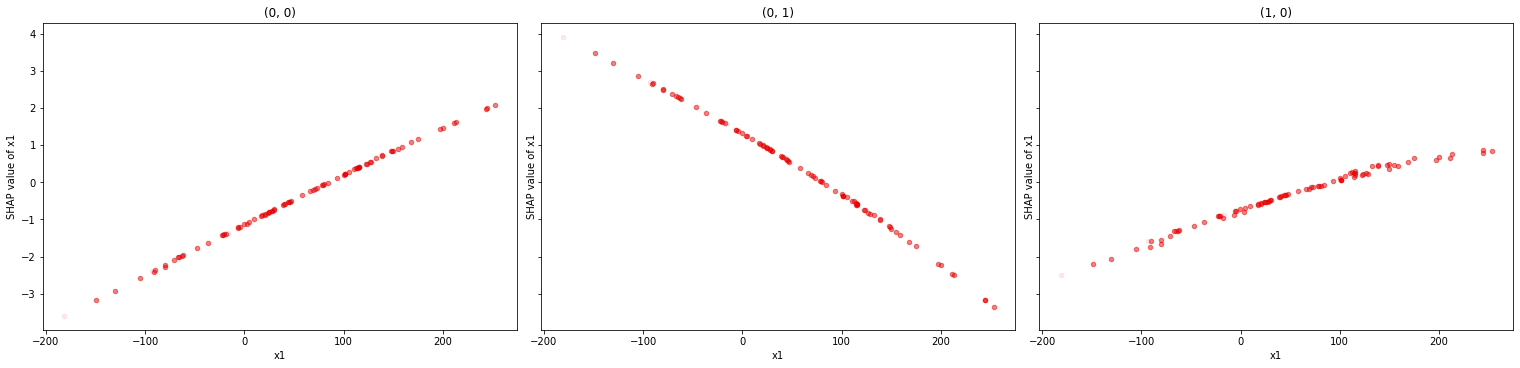

In [192]:
for feature in global_feature_order:
    node.parent.plot_feature(feature, focus=node, alpha=0.5)

In [193]:
node.describe_feature('x3')

,global,local-all,local-diff
count,300.000000,86.000000,86.000000
mean,9.979408,-120.883183,-120.883183
std,117.978412,62.960266,62.960266
min,-374.445022,-268.985858,-268.985858
25%,-59.339309,-164.934020,-164.934020
50%,34.019343,-117.753572,-117.753572
75%,93.596696,-65.570533,-65.570533
max,258.940851,-31.582491,-31.582491


### Node RRL

In [194]:
node = node.get_left()

RRL
(0, 0)    28
dtype: int64


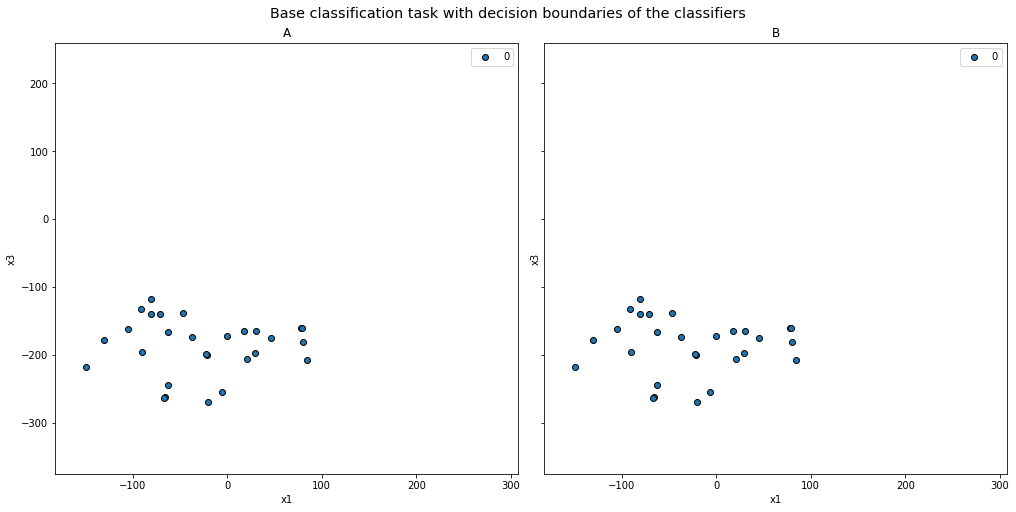

In [195]:
comparer.plot_individual_clf_decision_boundaries(node.shap_values.data, idx_x=0, idx_y=2, xlim=x1lim, ylim=x3lim)

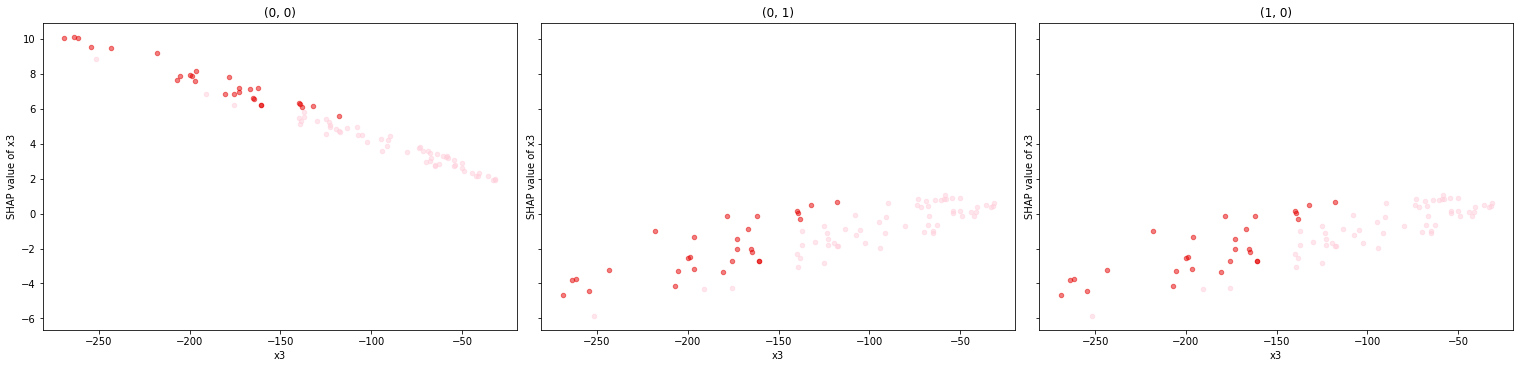

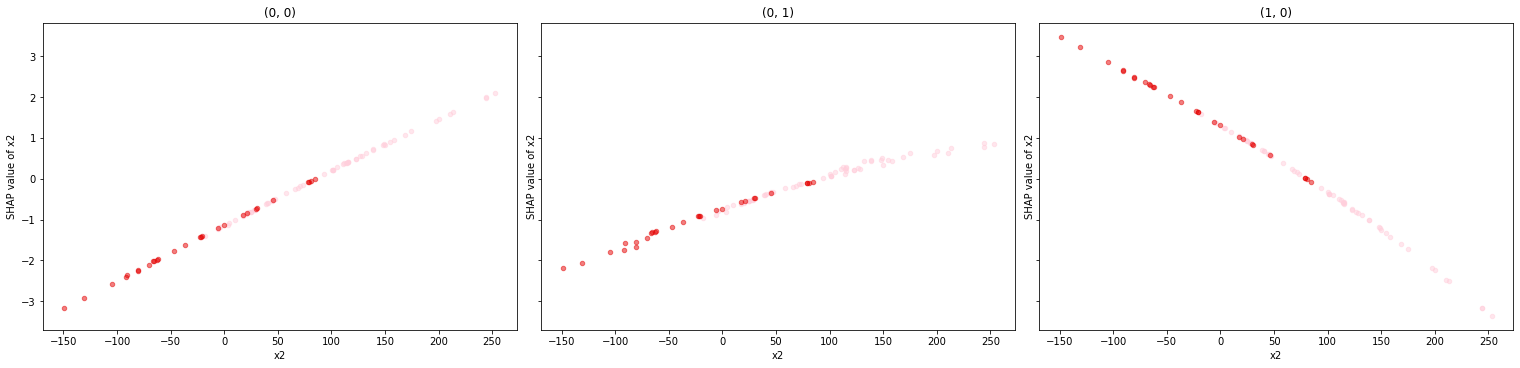

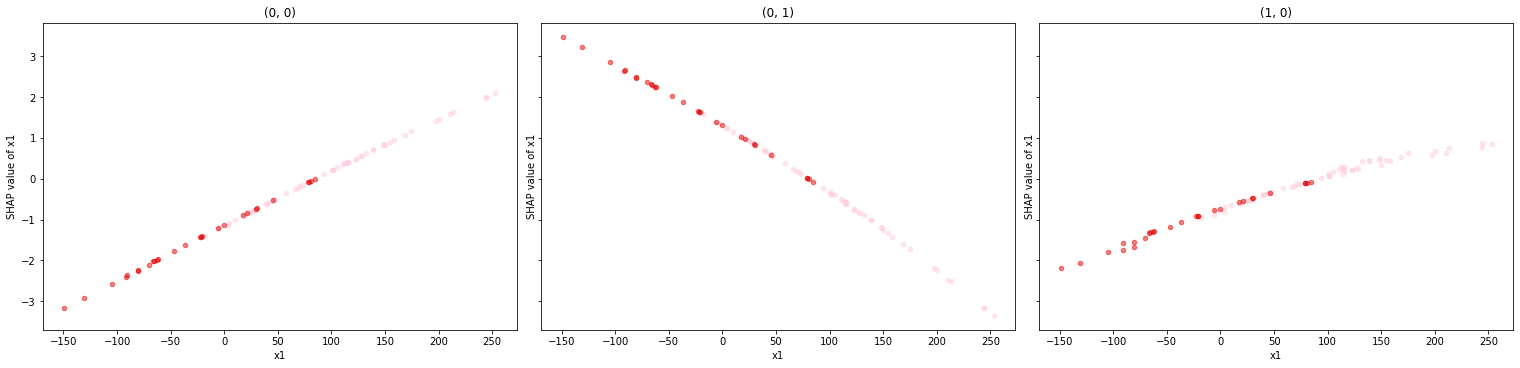

In [196]:
for feature in global_feature_order:
    node.parent.plot_feature(feature, focus=node, alpha=0.5)

In [197]:
node.describe_feature('x3')

,global,local-all,local-diff
count,300.000000,28.000000,28.000000
mean,9.979408,-187.230304,-187.230304
std,117.978412,41.673552,41.673552
min,-374.445022,-268.985858,-268.985858
25%,-59.339309,-205.757993,-205.757993
50%,34.019343,-176.976551,-176.976551
75%,93.596696,-161.824839,-161.824839
max,258.940851,-117.640009,-117.640009


In [198]:
node.describe_feature('x2')

,global,local-all,local-diff
count,300.000000,28.000000,28.000000
mean,84.138769,-26.531921,-26.531921
std,77.917955,65.874071,65.874071
min,-181.190181,-149.029558,-149.029558
25%,35.786394,-73.057970,-73.057970
50%,83.158128,-29.655225,-29.655225
75%,131.776480,23.167092,23.167092
max,307.157526,84.289423,84.289423


In [199]:
node.describe_feature('x1')

,global,local-all,local-diff
count,300.000000,28.000000,28.000000
mean,84.138769,-26.531921,-26.531921
std,77.917955,65.874071,65.874071
min,-181.190181,-149.029558,-149.029558
25%,35.786394,-73.057970,-73.057970
50%,83.158128,-29.655225,-29.655225
75%,131.776480,23.167092,23.167092
max,307.157526,84.289423,84.289423


In [200]:
node.test(x2=250)

,before,after
"(0, 0)",28,28


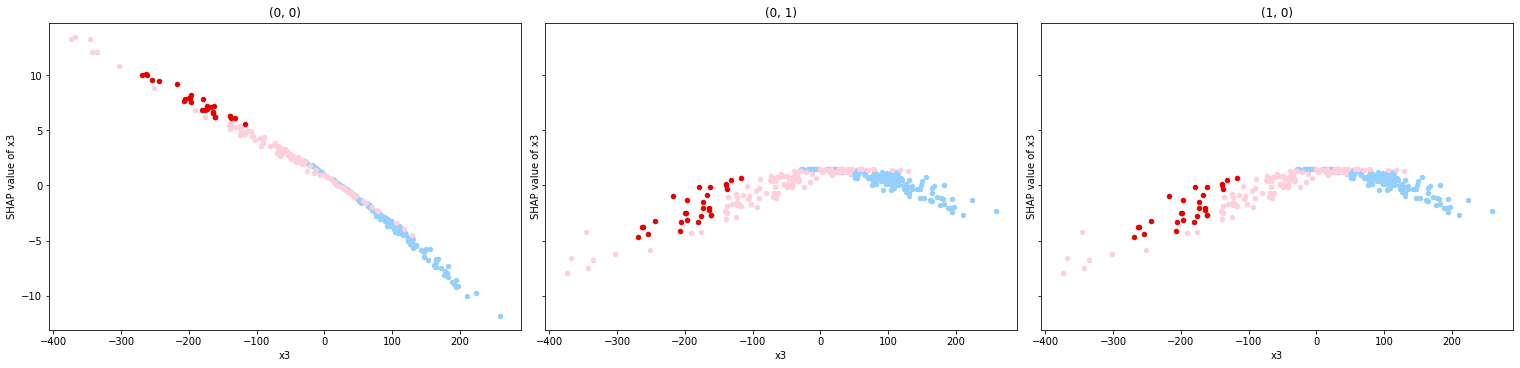

In [204]:
node.parent.parent.parent.plot_feature('x3', focus=node)

In [239]:
node.test(x3=0)

,before,after
"(0, 0)",28.0,4
"(1, 1)",NaN,24


In [240]:
node.test(x2=250)

,before,after
"(0, 0)",28,28


In [252]:
node.test(x3=23, x2=93)

,before,after
"(0, 0)",28.0,NaN
"(0, 1)",NaN,28.0


In [253]:
node.test(x3=23, x1=93)

,before,after
"(0, 0)",28.0,NaN
"(1, 0)",NaN,28.0


### Node RRR

In [255]:
node = node.parent.get_right()

RRR
(0, 0)    58
dtype: int64


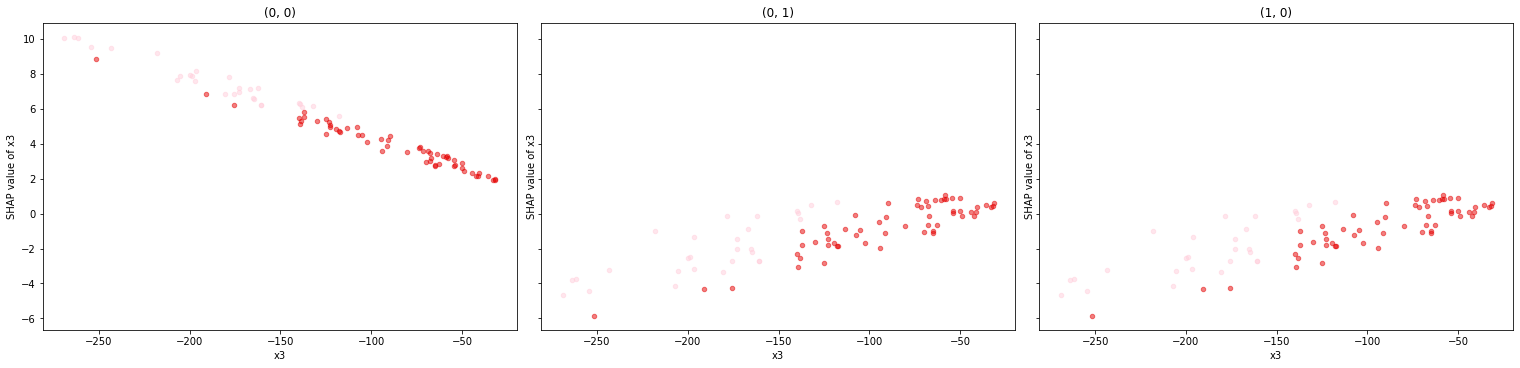

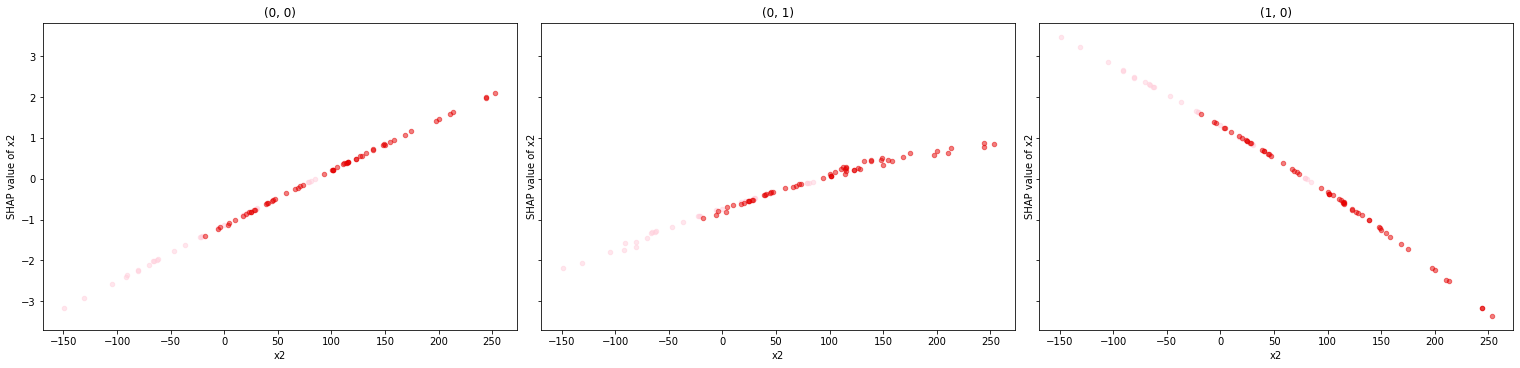

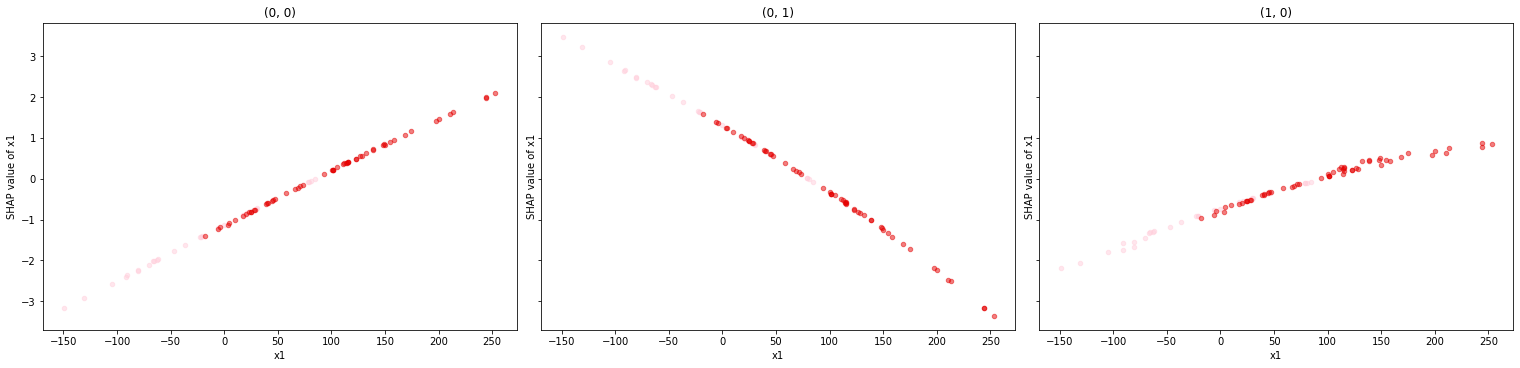

In [256]:
for feature in global_feature_order:
    node.parent.plot_feature(feature, focus=node, alpha=0.5)

In [287]:
node.describe_feature('x2')

,global,local-all,local-diff
count,300.000000,58.000000,58.000000
mean,84.138769,98.724123,98.724123
std,77.917955,68.795244,68.795244
min,-181.190181,-18.021552,-18.021552
25%,35.786394,40.345095,40.345095
50%,83.158128,103.357574,103.357574
75%,131.776480,138.608706,138.608706
max,307.157526,252.997660,252.997660


In [288]:
node.describe_feature('x1')

,global,local-all,local-diff
count,300.000000,58.000000,58.000000
mean,84.138769,98.724123,98.724123
std,77.917955,68.795244,68.795244
min,-181.190181,-18.021552,-18.021552
25%,35.786394,40.345095,40.345095
50%,83.158128,103.357574,103.357574
75%,131.776480,138.608706,138.608706
max,307.157526,252.997660,252.997660


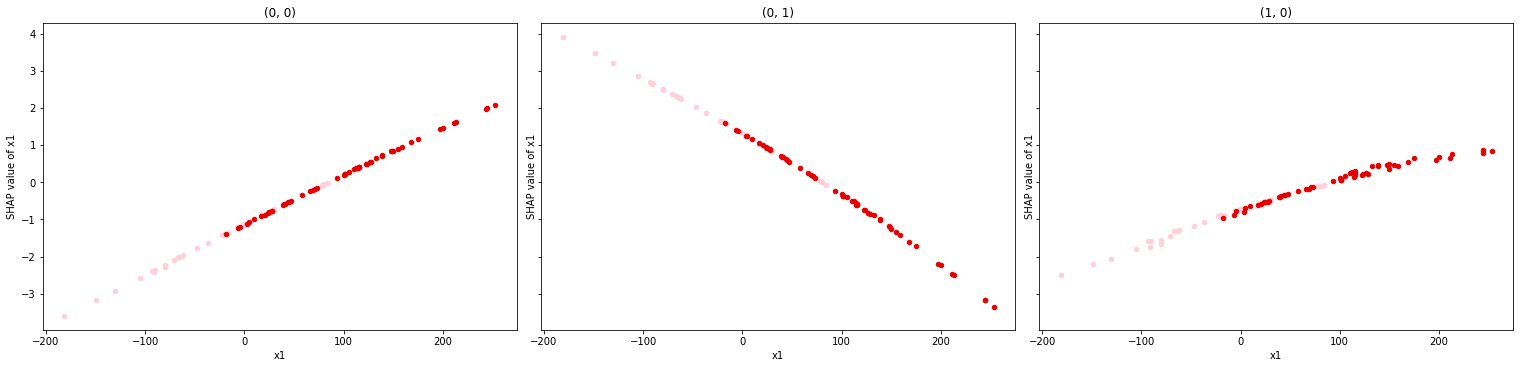

In [266]:
node.parent.parent.plot_feature('x1', focus=node)

In [274]:
node.test(x1=-150)

,before,after
"(0, 0)",58.0,3
"(0, 1)",NaN,55


In [275]:
node.test(x2=-150)

,before,after
"(0, 0)",58.0,3
"(1, 0)",NaN,55
